# 04: Automatic Blog Post Creator

> "Discover the power of Artificial Intelligence with OpenAI's powerful API to generate text and images in projects". Udemy course.

In [247]:
import os
import openai 

In [248]:
#os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

## Git Automatic Update

In [249]:
from git import Repo
import git
from pathlib import Path

In [250]:
pwd

'/home/tommaselli/Documents/GPT-Projects/04-Post_Creator'

In [251]:
PATH_BLOG_REPO = Path('/home/tommaselli/Documents/GPT-Projects/.git')
PATH_BLOG = PATH_BLOG_REPO.parent 
PATH_CONTENT =PATH_BLOG/'content'

In [252]:
PATH_CONTENT.mkdir(exist_ok=True,parents=True)

In [253]:
def update_blog(commit_message='updates blog'):
    # GitPython -- Repo Locatio 
    repo = Repo(PATH_BLOG_REPO)
    # git add .
    repo.git.add(all=True)
    # git commit -m "updates blog"
    repo.index.commit(commit_message)
    origin = repo.remote(name='origin')
    origin.push()

update in github (working):

In [254]:
random_text = 'orkepofmkmwẽw'

In [255]:
#with open(PATH_BLOG/'index.html', 'w') as f:
#    f.write(random_text)

#update_blog()

## Insert HTML with GPT

In [256]:
import shutil

In [257]:
def create_new_blog(title, content, cover_image): 
    cover_image = Path(cover_image)

    files = len(list(PATH_CONTENT.glob('*.html')))
    new_title = f'{files+1}.html'
    path_new_content = PATH_CONTENT/new_title

    shutil.copy(cover_iamge, PATH_CONTENT)
    if not os.path.exists(path_new_content):
        # WRITE A NEW HTML FILE
        with open(path_new_content, 'w') as f:
            f.write('<!DOCTYPE html>\n')
def create_new_blog(title, content, cover_image): 
    cover_image = Path(cover_image)

    files = len(list(PATH_CONTENT.glob('*.html')))
    new_title = f'{files+1}.html'
    path_new_content = PATH_CONTENT/new_title

    shutil.copy(cover_image, PATH_CONTENT)
    if not os.path.exists(path_new_content):
        # WRITE A NEW HTML FILE
        with open(path_new_content, 'w') as f:
            f.write('<!DOCTYPE html>\n')
            f.write('<html>\n')
            f.write('<head>\n')
            f.write('<title>' + title + '</title>\n')
            f.write('</head>\n')
            f.write('<body>\n')
            f.write('<header>\n')
            f.write('<h1>' + title + '</h1>\n')
            f.write('</header>\n')
            f.write('<img src="' + cover_image.name + '">\n')
            ### GPT completion

            f.write(content.replace('\n', '<br>\n'))
            f.write('</body>\n')
            f.write('</html>\n')
            print('Blog created')
            return path_new_content
            
    else: 
        raise FileExistsError('File already exists')

In [258]:
#path_new_content = create_new_blog('Test Blog', 'This is a test blog', 'cover.png')

In [259]:
from bs4 import BeautifulSoup as Soup

In [260]:
with open(PATH_BLOG/'index.html') as index:
    soup = Soup(index.read())

In [261]:
str(soup)

'<html>\n<head>\n<title>\n   Page\n  </title>\n</head>\n<body>\n</body>\n</html>\n'

In [262]:
# checking duplicate links 
def check_duplicate(path_new_content, links):
    urls = [str(link.get('href')) for link in links] # 1.html, 2.html, 3.html...
    content_path = str(Path(*path_new_content.parts[-2:])) # (rel_path)/1.html, check if 1.html is in urls
    return content_path in urls

In [263]:
def write_index(path_new_content):
    with open(PATH_BLOG/'index.html') as index:
        soup = Soup(index.read())

    links = soup.find_all('a')
    try: 
        last_link = links[-1]
    except: 
        last_link = soup.new_tag('a')
        soup.append(last_link)

    if check_duplicate(path_new_content, links):
        raise ValueError('Duplicate link found')

    link_new_blog = soup.new_tag('a', href=Path(*path_new_content.parts[-2:]))
    link_new_blog.string = path_new_content.name.split('.')[0]
    last_link.insert_after(link_new_blog)

    with open(PATH_BLOG/'index.html', 'w') as index:
        index.write(str(soup.prettify(formatter='html')))

In [264]:
#write_index(path_new_content)
#update_blog('Added new blog')

# Add GPT

In [265]:
def create_prompt(title):
    prompt = ''' 
    Biography: My name is Felipe and I am a Python professional and instructor for coding.

    Blog
    Title: {}
    tags: tech, python, coding, AI machine learning
    Summarry: I talk about what the future of AI could hold for python developers
    Full text: 
    '''.format(title)
    return prompt 

In [266]:
title = 'The future of Python and AI'
prompt = create_prompt(title)
prompt

' \n    Biography: My name is Felipe and I am a Python professional and instructor for coding.\n\n    Blog\n    Title: The future of Python and AI\n    tags: tech, python, coding, AI machine learning\n    Summarry: I talk about what the future of AI could hold for python developers\n    Full text: \n    '

In [267]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": prompt},
    ],
    temperature=0.75,
    max_tokens=1024,
)

In [268]:
blog_content = response.choices[0].message.content
blog_content

"In the world of technology and coding, the future of artificial intelligence (AI) is an exciting and rapidly evolving field. As a Python professional and instructor, I have seen firsthand how Python has become a major player in the development of AI and machine learning applications.\n\nPython's simplicity and readability make it an ideal language for AI development, allowing developers to quickly prototype and test algorithms. With the rise of deep learning frameworks such as TensorFlow and PyTorch, Python has become even more essential for building cutting-edge AI models.\n\nIn the future, I believe that Python will continue to be a key language for AI development. As AI becomes more integrated into our daily lives, the demand for skilled Python developers will only increase. From self-driving cars to virtual assistants, the possibilities for AI applications are endless.\n\nAs a Python professional, I am excited to see what the future holds for AI and Python developers. The potentia

In [269]:
def dalle2_prompt(title):
    prompt = f'pixel art showing {title}'
    return prompt 

In [270]:
image_prompt = dalle2_prompt(title)

In [271]:
response_img = openai.images.generate(
    model="dall-e-2",
    prompt=image_prompt,
    size="1024x1024",
    quality="standard",
    n=1,
)

In [ ]:
img_url = response_img.data[0].url
img_url 

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-JgMgchvzVB0eRIG8oYeeZhpj/user-nXtavWkYPNEvu4bcyzyhE3iU/img-7jVsw4BTgU21EmCwpcJBIRt5.png?st=2024-03-26T00%3A42%3A39Z&se=2024-03-26T02%3A42%3A39Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-03-25T21%3A10%3A15Z&ske=2024-03-26T21%3A10%3A15Z&sks=b&skv=2021-08-06&sig=XTDUUbEWvl35q0O/ikUG8nNSLqNzRocbsWqm0ZNthA4%3D'

In [ ]:
import requests

In [ ]:
def save_image(img_url, file_name):
    image_res = requests.get(img_url, stream=True)
    if image_res.status_code == 200: 
        with open(file_name, 'wb') as f:
            shutil.copyfileobj(image_res.raw, f)
    else:
        print('ERROR LOADING IMAGE')
    
    return image_res.status_code

In [ ]:
save_image(img_url, file_name='cover.png') # 200 == ok 

200

In [ ]:
from PIL import Image

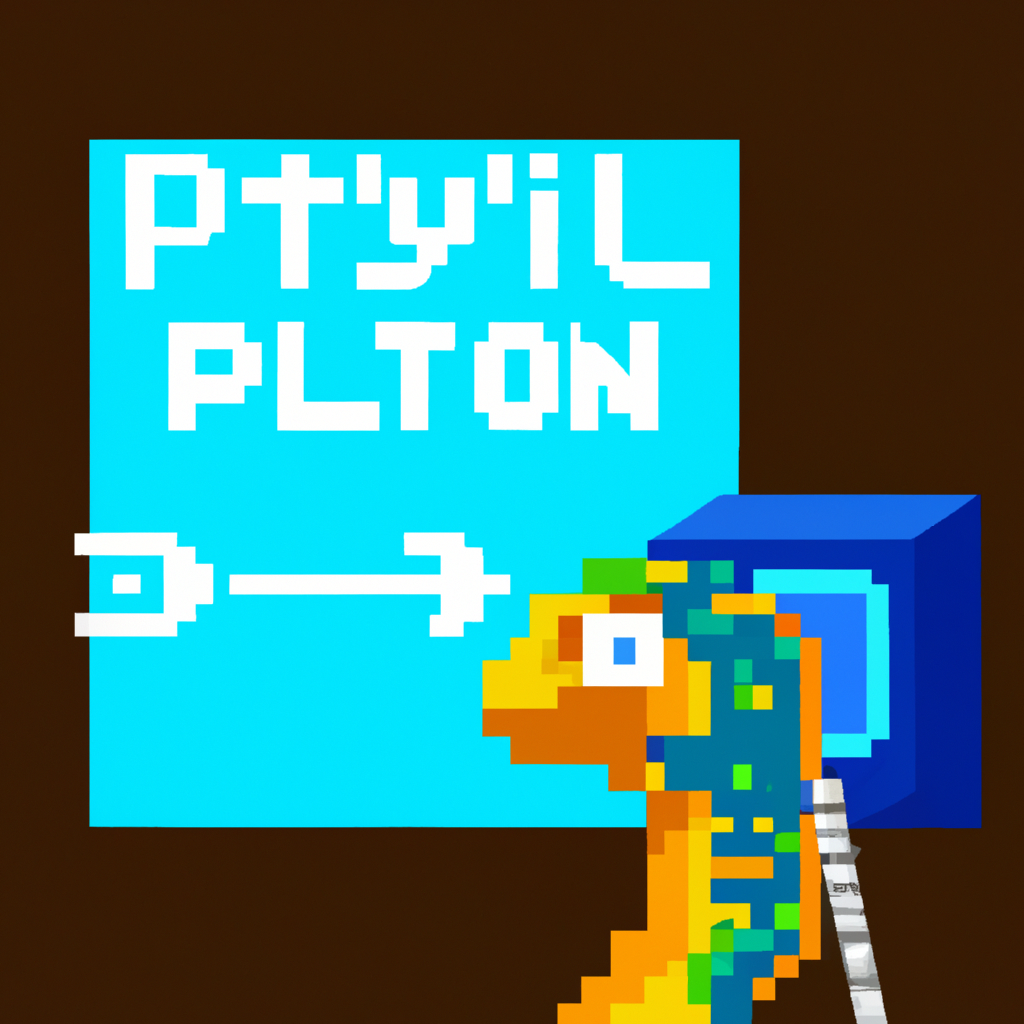

In [ ]:
Image.open('cover.png')

## Create blog

In [ ]:
path_new_content = create_new_blog(title, blog_content, 'cover.png')
write_index(path_new_content)
update_blog('Added new blog')